In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import izip, cycle

import seaborn as sns

pd.set_option('display.max_columns', 80)

%matplotlib inline

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('./data/Train_Fyxd0t8.csv', index_col='ID')
test = pd.read_csv('./data/Test_C1XBIYq.csv', index_col='ID')

In [5]:
# http://stackoverflow.com/questions/21925114/is-there-an-implementation-of-missingmaps-in-pythons-ecosystem

def missmap(df, ax=None, colors=None, aspect=4, sort='descending',
            title=None, **kwargs):
    """
    Plot the missing values of df.

    Parameters
    ----------
    df : pandas DataFrame
    ax : matplotlib axes
        if None then a new figure and axes will be created
    colors : dict
        dict with {True: c1, False: c2} where the values are
        matplotlib colors.
    aspect : int
        the width to height ratio for each rectangle.
    sort : one of {'descending', 'ascending', None}
    title : str
    kwargs : dict
        matplotlib.axes.bar kwargs

    Returns
    -------
    ax : matplotlib axes

    """
    if ax is None:
        fig, ax = plt.subplots()

    # setup the axes
    dfn = pd.isnull(df)

    if sort in ('ascending', 'descending'):
        counts = dfn.sum()
        sort_dict = {'ascending': True, 'descending': False}
        counts.sort_values(ascending=sort_dict[sort], inplace=True)
        dfn = dfn[counts.index]

    ny = len(df)
    nx = len(df.columns)
    # each column is a stacked bar made up of ny patches.
    xgrid = np.tile(np.arange(len(df.columns)), (ny, 1)).T
    ygrid = np.tile(np.arange(ny), (nx, 1))
    # xys is the lower left corner of each patch
    xys = (zip(x, y) for x, y in izip(xgrid, ygrid))

    if colors is None:
        colors = {True: '#EAF205', False: 'k'}

    widths = cycle([aspect])
    heights = cycle([1])

    for xy, width, height, col in izip(xys, widths, heights, dfn.columns):
        color_array = dfn[col].map(colors)

        rects = [Rectangle(xyc, width, height, **kwargs)
                 for xyc, c in zip(xy, color_array)]

        p_coll = collections.PatchCollection(rects, color=color_array,
                                             edgecolor=color_array, **kwargs)
        ax.add_collection(p_coll, autolim=False)

    # post plot aesthetics
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)

    ax.set_xticks(.5 + np.arange(nx))  # center the ticks
    ax.set_xticklabels(dfn.columns)
    for t in ax.get_xticklabels():
        t.set_rotation(90)

    # remove tick lines
    ax.tick_params(axis='both', which='both', bottom='off', left='off',
                   labelleft='off')
    ax.grid(False)

    if title:
        ax.set_title(title)
    return ax

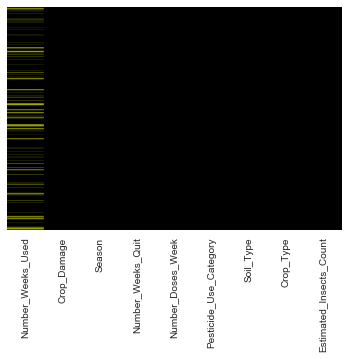

In [9]:
ax = missmap(train[:1000]);

### As you can see number of weeks used feature has lot of missing values

In [19]:
print '%f percent missing values for feature number of weeks used ' %(train.Number_Weeks_Used.isnull().sum() * 1. / len(train) * 100)

10.128520 percent missing values for feature number of weeks used 


## Histograms of features to get a sense of distribution of those features

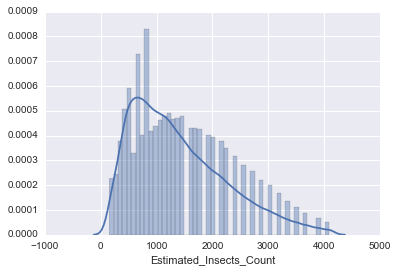

In [20]:
# Estimated Insects Count
sns.distplot(train.Estimated_Insects_Count);

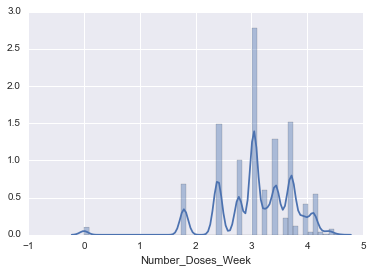

In [42]:
# Number of doses per week
sns.distplot(np.log1p(train.Number_Doses_Week));

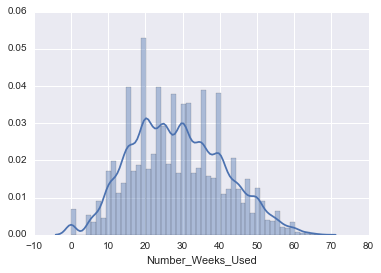

In [23]:
# Number of weeks used
sns.distplot(train[train.Number_Weeks_Used.notnull()].Number_Weeks_Used);

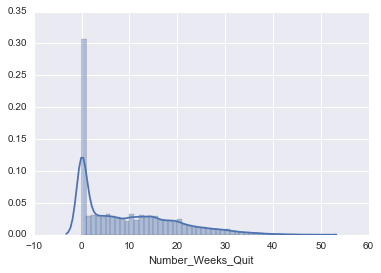

In [24]:
# Number of weeks quit
sns.distplot(train.Number_Weeks_Quit);

In [25]:
# mosaic plots
from statsmodels.graphics.mosaicplot import mosaic

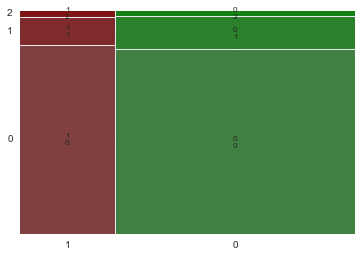

In [26]:
mosaic(train, ['Crop_Type', 'Crop_Damage']);

** Width of the rectangles determines the number of examples for that particular type. **

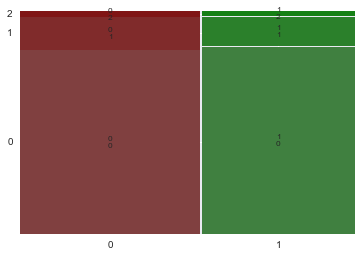

In [27]:
mosaic(train, ['Soil_Type', 'Crop_Damage']);

** Soil Type - 1 has a slightly higher chance of staying alive **

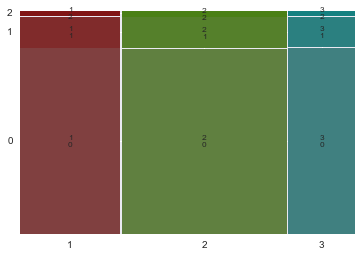

In [28]:
mosaic(train, ['Season', 'Crop_Damage']);

** Season does not seem have to much of an impact on the outcome **

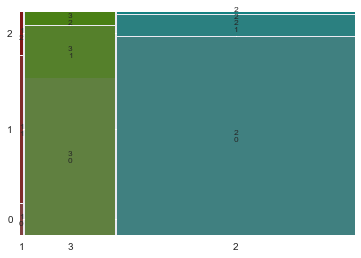

In [29]:
mosaic(train, ['Pesticide_Use_Category', 'Crop_Damage']);

** So of you have never used pesticide, harvest has a low chance of survival, and if you are currently using pesticides then there are considerable chances of damage due to these pesticides. **

## Boxplots

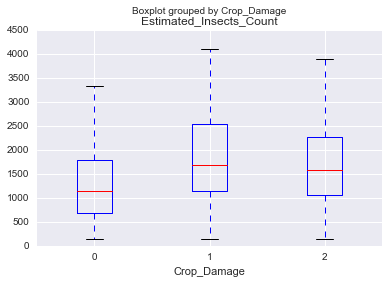

In [31]:
train.boxplot(column='Estimated_Insects_Count', by='Crop_Damage');

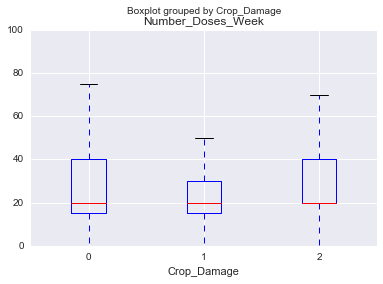

In [33]:
train.boxplot(column='Number_Doses_Week', by='Crop_Damage');

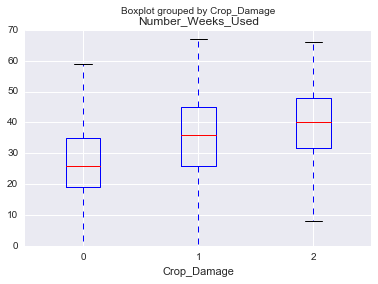

In [34]:
train[train.Number_Weeks_Used.notnull()].boxplot(column='Number_Weeks_Used', by='Crop_Damage');

In [8]:
train.Number_Weeks_Used.quantile(q=0.75)

37.0

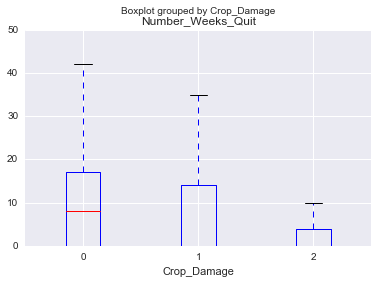

In [35]:
train.boxplot(column='Number_Weeks_Quit', by='Crop_Damage');

In [36]:
## Crop Damage vs missing values in Num_Weeks_Used
train = train.fillna(-1)

In [41]:
pd.crosstab(train[train.Number_Weeks_Used==-1].Number_Weeks_Used, train[train.Number_Weeks_Used==-1].Crop_Damage, margins=True)

Crop_Damage,0,1,2,All
Number_Weeks_Used,,,,
-1.0,7495,1248,257,9000
All,7495,1248,257,9000


## Pairplots

C:\Users\Abhishek\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


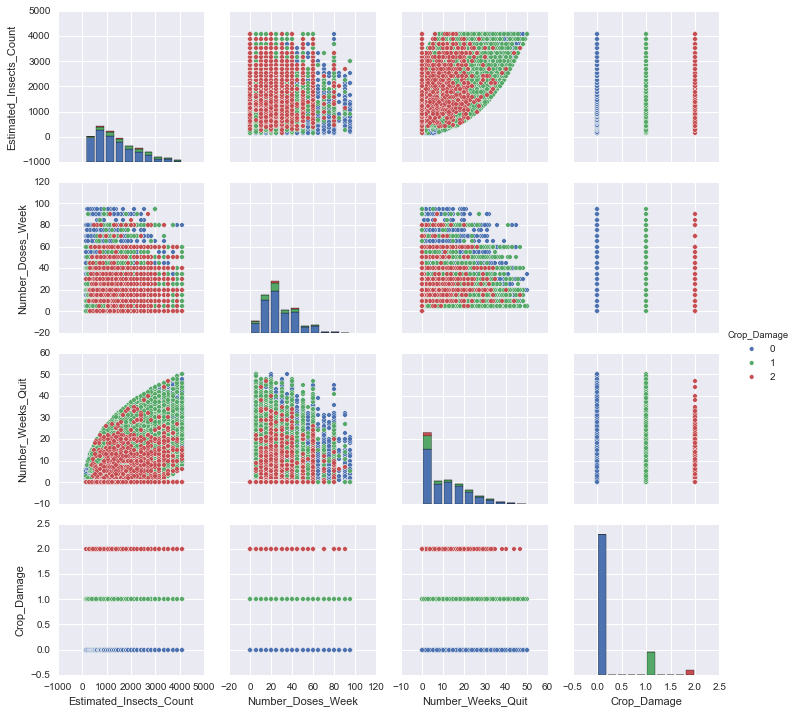

In [5]:
features = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Quit', 'Crop_Damage']

sns.pairplot(train[features], hue='Crop_Damage');

## Pivot tables

In [12]:
train.pivot_table(index='Crop_Damage', columns='Pesticide_Use_Category', values='Estimated_Insects_Count')

Pesticide_Use_Category,1,2,3
Crop_Damage,,,
0,1508.889831,1361.284543,1163.115663
1,1565.214801,2071.961462,1616.933814
2,2039.006061,2025.141384,1560.622873


In [102]:
train.Estimated_Insects_Count.quantile(q=0.80)

2138.0

In [13]:
train.pivot_table(index='Crop_Damage', columns='Pesticide_Use_Category', values='Number_Doses_Week')

Pesticide_Use_Category,1,2,3
Crop_Damage,,,
0,0,26.456161,25.180632
1,0,27.024868,23.488822
2,0,31.509573,26.552076


In [17]:
train.pivot_table(index='Crop_Damage', columns='Pesticide_Use_Category', values='Number_Weeks_Quit')

Pesticide_Use_Category,1,2,3
Crop_Damage,,,
0,0,13.178026,0
1,0,15.466238,0
2,0,11.254786,0


In [23]:
train.Number_Weeks_Quit.describe()

count    88858.000000
mean         9.589986
std          9.900631
min          0.000000
25%          0.000000
50%          7.000000
75%         16.000000
max         50.000000
Name: Number_Weeks_Quit, dtype: float64

In [18]:
train.pivot_table(index='Crop_Damage', columns='Pesticide_Use_Category', values='Number_Weeks_Used')

Pesticide_Use_Category,1,2,3
Crop_Damage,,,
0,0,25.976496,32.087103
1,0,31.533223,41.163126
2,0,36.460912,42.592791


In [20]:
train.pivot_table(index='Crop_Damage', columns='Season', values='Number_Weeks_Used')

Season,1,2,3
Crop_Damage,,,
0,10.112435,10.130853,10.057791
1,7.625400,7.451349,8.087561
2,3.391831,3.149094,3.600457


In [21]:
train.pivot_table(index='Crop_Damage', columns='Season', values='Number_Weeks_Quit')

Season,1,2,3
Crop_Damage,,,
0,10.112435,10.130853,10.057791
1,7.625400,7.451349,8.087561
2,3.391831,3.149094,3.600457


In [22]:
train.pivot_table(index='Crop_Damage', columns='Season', values='Number_Doses_Week')

Season,1,2,3
Crop_Damage,,,
0,26.198817,26.098804,26.049516
1,24.018143,24.201962,24.353519
2,25.658094,26.301483,26.278539


In [24]:
train.pivot_table(index='Crop_Damage', columns='Crop_Type', values='Number_Doses_Week')

Crop_Type,0,1
Crop_Damage,,
0,28.020861,21.442451
1,25.992503,18.788269
2,28.291848,21.154391


In [25]:
train.pivot_table(index='Crop_Damage', columns='Crop_Type', values='Estimated_Insects_Count')

Crop_Type,0,1
Crop_Damage,,
0,1355.943177,1216.752842
1,1902.597349,1650.781180
2,1810.561917,1550.267705


In [27]:
train.pivot_table(index='Crop_Damage', columns='Crop_Type', values='Number_Weeks_Used')

Crop_Type,0,1
Crop_Damage,,
0,27.541620,26.876130
1,35.218349,32.732928
2,40.104788,32.743089


In [28]:
train.pivot_table(index='Crop_Damage', columns='Crop_Type', values='Number_Weeks_Quit')

Crop_Type,0,1
Crop_Damage,,
0,11.551631,6.566729
1,9.312799,2.641315
2,4.391413,0.828612


In [30]:
train.pivot_table(index='Crop_Damage', columns='Soil_Type', values='Estimated_Insects_Count')

Soil_Type,0,1
Crop_Damage,,
0,1351.692051,1274.027444
1,1898.119804,1762.467874
2,1800.677444,1636.989827


In [41]:
train.pivot_table(index='Crop_Damage', columns='Soil_Type', values='Number_Doses_Week')

Soil_Type,0,1
Crop_Damage,,
0,24.899475,27.532052
1,23.440242,25.131677
2,25.781955,26.561546


In [42]:
train.pivot_table(index='Crop_Damage', columns='Soil_Type', values='Number_Weeks_Used')

Soil_Type,0,1
Crop_Damage,,
0,27.963253,26.643803
1,35.842231,32.946906
2,39.470439,35.774083


In [43]:
train.pivot_table(index='Crop_Damage', columns='Soil_Type', values='Number_Weeks_Quit')

Soil_Type,0,1
Crop_Damage,,
0,10.074320,10.152717
1,7.464260,7.846843
2,3.108271,3.568667


In [104]:
numeric_features = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']
train.groupby(['Crop_Damage', 'Pesticide_Use_Category'])[numeric_features].mean()

Estimated_Insects_Count  \
Crop_Damage Pesticide_Use_Category                            
0           1                                   1508.889831   
            2                                   1361.284543   
            3                                   1163.115663   
1           1                                   1565.214801   
            2                                   2071.961462   
            3                                   1616.933814   
2           1                                   2039.006061   
            2                                   2025.141384   
            3                                   1560.622873   

                                    Number_Doses_Week  Number_Weeks_Used  \
Crop_Damage Pesticide_Use_Category                                         
0           1                                0.000000           0.000000   
            2                               26.456161          25.976496   
            3                               25.180632          32.087103   
1           1                                0.000000           0.000000   
            2                               27.024868          31.533223   
            3                               23.488822          41.163126   
2           1                                0.000000           0.000000   
            2                               31.509573          36.460912   
            3                               26.552076          42.592791   

                                    Number_Weeks_Quit  
Crop_Damage Pesticide_Use_Category                     
0           1                                0.000000  
            2                               13.178026  
            3                                0.000000  
1           1                                0.000000  
            2                               15.466238  
            3                                0.000000  
2           1                                0.000000  
            2                               11.254786  
            3                                0.000000

In [113]:
pd.crosstab(index=train.Crop_Damage, columns=[train.Pesticide_Use_Category, train.Season], margins=True)

Pesticide_Use_Category    1                2                   3               \
Season                    1    2    3      1      2      3     1      2     3   
Crop_Damage                                                                     
0                        31   66   21  17258  28312  11388  5204   8503  3455   
1                       180  297   77   1852   2997   1223  1716   2821  1144   
2                        46   86   33    200    346    133   415    782   272   
All                     257  449  131  19310  31655  12744  7335  12106  4871   

Pesticide_Use_Category    All  
Season                         
Crop_Damage                    
0                       74238  
1                       12307  
2                        2313  
All                     88858

In [114]:
pd.crosstab(index=train.Crop_Damage, columns=[train.Pesticide_Use_Category, train.Crop_Type], margins=True)

Pesticide_Use_Category    1           2             3           All
Crop_Type                 0    1      0      1      0      1       
Crop_Damage                                                        
0                        57   61  44368  12590   8353   8809  74238
1                       261  293   5431    641   3512   2169  12307
2                        54  111    611     68    942    527   2313
All                     372  465  50410  13299  12807  11505  88858

In [117]:
train.pivot_table(index='Crop_Damage', columns=['Pesticide_Use_Category', 'Crop_Type'], values='Number_Weeks_Quit')

Pesticide_Use_Category  1             2             3   
Crop_Type               0  1          0          1  0  1
Crop_Damage                                             
0                       0  0  13.741255  11.193169  0  0
1                       0  0  15.782545  12.786271  0  0
2                       0  0  11.549918   8.602941  0  0

In [154]:
train.pivot_table(index='Crop_Damage', columns='Pesticide_Use_Category', values=['Estimated_Insects_Count', 'Number_Weeks_Used'])

Estimated_Insects_Count                            \
Pesticide_Use_Category                       1            2            3   
Crop_Damage                                                                
0                                  1508.889831  1361.284543  1163.115663   
1                                  1565.214801  2071.961462  1616.933814   
2                                  2039.006061  2025.141384  1560.622873   

                       Number_Weeks_Used                        
Pesticide_Use_Category                 1          2          3  
Crop_Damage                                                     
0                                      0  25.976496  32.087103  
1                                      0  31.533223  41.163126  
2                                      0  36.460912  42.592791

In [132]:
train.groupby(['Crop_Damage', 'Pesticide_Use_Category'])['Number_Weeks_Quit'].mean()

Crop_Damage  Pesticide_Use_Category
0            1                          0.000000
             2                         13.178026
             3                          0.000000
1            1                          0.000000
             2                         15.466238
             3                          0.000000
2            1                          0.000000
             2                         11.254786
             3                          0.000000
Name: Number_Weeks_Quit, dtype: float64

In [130]:
train.groupby(['Crop_Damage', 'Pesticide_Use_Category'])['Number_Weeks_Used'].mean()

Crop_Damage  Pesticide_Use_Category
0            1                          0.000000
             2                         25.976496
             3                         32.087103
1            1                          0.000000
             2                         31.533223
             3                         41.163126
2            1                          0.000000
             2                         36.460912
             3                         42.592791
Name: Number_Weeks_Used, dtype: float64

In [131]:
train.groupby(['Crop_Damage', 'Pesticide_Use_Category'])['Number_Doses_Week'].mean()

Crop_Damage  Pesticide_Use_Category
0            1                          0.000000
             2                         26.456161
             3                         25.180632
1            1                          0.000000
             2                         27.024868
             3                         23.488822
2            1                          0.000000
             2                         31.509573
             3                         26.552076
Name: Number_Doses_Week, dtype: float64

In [133]:
train.groupby(['Crop_Damage', 'Pesticide_Use_Category'])['Estimated_Insects_Count'].mean()

Crop_Damage  Pesticide_Use_Category
0            1                         1508.889831
             2                         1361.284543
             3                         1163.115663
1            1                         1565.214801
             2                         2071.961462
             3                         1616.933814
2            1                         2039.006061
             2                         2025.141384
             3                         1560.622873
Name: Estimated_Insects_Count, dtype: float64

In [157]:
train.groupby(['Crop_Damage', 'Crop_Type']).size()

Crop_Damage  Crop_Type
0            0            52778
             1            21460
1            0             9204
             1             3103
2            0             1607
             1              706
dtype: int64

In [156]:
train.Crop_Damage.value_counts()

0    74238
1    12307
2     2313
Name: Crop_Damage, dtype: int64

In [191]:
pd.crosstab(index=train.Crop_Damage, columns=[train.Pesticide_Use_Category, train.Number_Doses_Week], margins=True)

Pesticide_Use_Category    1     2                                            \
Number_Doses_Week         0     5    10    15     20    25    30   35    40   
Crop_Damage                                                                   
0                       118  3260  7981  5087  14901  2875  6788  881  8193   
1                       554   217   705   403   2146   196   646   60  1019   
2                       165     5    34    29    224    34    91   10   151   
All                     837  3482  8720  5519  17271  3105  7525  951  9363   

Pesticide_Use_Category                                                      \
Number_Doses_Week        45    50   55    60  65   70  75   80  85  90  95   
Crop_Damage                                                                  
0                       553  2303  181  3096  48  207  48  468   9  57  22   
1                        32   202   24   330   3   19   2   60   1   6   1   
2                         1    25    1    55   0    5   0   11   1   2   0   
All                     586  2530  206  3481  51  231  50  539  11  65  23   

Pesticide_Use_Category     3                                                \
Number_Doses_Week          5    10    15    20    25    30   35    40   45   
Crop_Damage                                                                  
0                       1747  2441  2021  2888  1435  1920  766  1899  315   
1                        256   837   547  1896   272   753   95   778   23   
2                         35   113    91   534    78   240   20   258   12   
All                     2038  3391  2659  5318  1785  2913  881  2935  350   

Pesticide_Use_Category                                          All  
Number_Doses_Week        50  55   60  65  70  75   80  90 95         
Crop_Damage                                                          
0                       692  69  740   9  68   8  122  16  6  74238  
1                        98   1  105   4   2   3    8   2  1  12307  
2                        41   1   41   0   2   0    3   0  0   2313  
All                     831  71  886  13  72  11  133  18  7  88858

In [192]:
pd.crosstab(index=train.Crop_Damage, columns=[train.Pesticide_Use_Category, train.Number_Weeks_Quit], margins=True)

Pesticide_Use_Category    1     2                                            \
Number_Weeks_Quit         0     0     1     2     3     4     5     6     7   
Crop_Damage                                                                   
0                       118  2079  2490  2535  2330  2286  2496  2298  2147   
1                       554    38   113   175   210   206   280   246   234   
2                       165     8    17    33    38    36    55    40    37   
All                     837  2125  2620  2743  2578  2528  2831  2584  2418   

Pesticide_Use_Category                                                        \
Number_Weeks_Quit          8     9    10    11    12    13    14    15    16   
Crop_Damage                                                                    
0                       2048  1686  2546  1871  2421  2237  2318  2362  1887   
1                        215   191   301   191   244   219   268   272   203   
2                         31    20    46    28    36    29    24    34    18   
All                     2294  1897  2893  2090  2701  2485  2610  2668  2108   

Pesticide_Use_Category                                                        \
Number_Weeks_Quit         17    18    19    20    21    22    23    24    25   
Crop_Damage                                                                    
0                       1811  1846  1615  1949  1275  1261  1029   940   960   
1                        193   172   204   233   148   142   132   108   146   
2                         14    12    22    27    13    11     5     6     3   
All                     2018  2030  1841  2209  1436  1414  1166  1054  1109   

Pesticide_Use_Category                                                         \
Number_Weeks_Quit        26   27   28   29   30   31   32   33   34   35   36   
Crop_Damage                                                                     
0                       774  736  698  624  654  451  445  321  292  251  222   
1                       115   81  108   90   92   77   58   46   49   49   26   
2                         5    3    2    5    5    2    2    3    4    1    0   
All                     894  820  808  719  751  530  505  370  345  301  248   

Pesticide_Use_Category                                                         \
Number_Weeks_Quit        37   38   39   40  41  42  43  44  45  46  47  48 49   
Crop_Damage                                                                     
0                       178  136   92  103  66  60  43  29  23  12  14   4  2   
1                        43   25   17   29  20  15   8   8   7  10   6   6  2   
2                         0    1    0    1   0   0   0   1   0   0   1   0  0   
All                     221  162  109  133  86  75  51  38  30  22  21  10  4   

Pesticide_Use_Category         3    All  
Number_Weeks_Quit      50      0         
Crop_Damage                              
0                       5  17162  74238  
1                       1   5681  12307  
2                       0   1469   2313  
All                     6  24312  88858

In [179]:
pd.crosstab(train.Crop_Damage, train.Number_Weeks_Used, margins=True)

Number_Weeks_Used,0.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,All
Crop_Damage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,107,539,356,401,528,462,1717,757,1259,1155,1430,2323,1669,1739,1889,1679,3509,1797,2136,1966,1966,2789,1830,1773,1872,1586,3042,1506,1719,1535,1582,1909,1422,1366,1292,1082,1834,861,981,835,760,884,615,548,535,389,756,290,316,280,227,236,141,114,107,64,119,38,39,31,26,12,11,5,74238
1,495,33,15,16,30,21,111,25,83,46,68,156,88,90,123,87,343,92,167,108,167,295,199,154,196,156,627,202,283,221,277,432,275,286,271,256,706,232,283,249,254,352,233,218,192,188,465,123,172,113,125,164,94,78,68,34,122,26,20,17,15,15,4,3,12307
2,138,0,0,1,1,0,7,1,4,2,4,7,5,6,5,3,26,7,7,12,19,36,17,25,29,22,96,34,47,30,53,69,52,50,63,43,167,70,63,57,57,76,59,51,65,42,130,34,46,38,33,39,20,22,8,7,28,6,6,2,3,4,2,0,2313
All,740,572,371,418,559,483,1835,783,1346,1203,1502,2486,1762,1835,2017,1769,3878,1896,2310,2086,2152,3120,2046,1952,2097,1764,3765,1742,2049,1786,1912,2410,1749,1702,1626,1381,2707,1163,1327,1141,1071,1312,907,817,792,619,1351,447,534,431,385,439,255,214,183,105,269,70,65,50,44,31,17,8,88858


In [180]:
pd.crosstab(train.Crop_Damage, train.Number_Weeks_Quit, margins=True)

Number_Weeks_Quit,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,All
Crop_Damage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19359,2490,2535,2330,2286,2496,2298,2147,2048,1686,2546,1871,2421,2237,2318,2362,1887,1811,1846,1615,1949,1275,1261,1029,940,960,774,736,698,624,654,451,445,321,292,251,222,178,136,92,103,66,60,43,29,23,12,14,4,2,5,74238
1,6273,113,175,210,206,280,246,234,215,191,301,191,244,219,268,272,203,193,172,204,233,148,142,132,108,146,115,81,108,90,92,77,58,46,49,49,26,43,25,17,29,20,15,8,8,7,10,6,6,2,1,12307
2,1642,17,33,38,36,55,40,37,31,20,46,28,36,29,24,34,18,14,12,22,27,13,11,5,6,3,5,3,2,5,5,2,2,3,4,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,2313
All,27274,2620,2743,2578,2528,2831,2584,2418,2294,1897,2893,2090,2701,2485,2610,2668,2108,2018,2030,1841,2209,1436,1414,1166,1054,1109,894,820,808,719,751,530,505,370,345,301,248,221,162,109,133,86,75,51,38,30,22,21,10,4,6,88858


In [181]:
pd.crosstab(train.Crop_Damage, train.Number_Doses_Week, margins=True)

Number_Doses_Week,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,All
Crop_Damage,,,,,,,,,,,,,,,,,,,,,
0,118,5007,10422,7108,17789,4310,8708,1647,10092,868,2995,250,3836,57,275,56,590,9,73,28,74238
1,554,473,1542,950,4042,468,1399,155,1797,55,300,25,435,7,21,5,68,1,8,2,12307
2,165,40,147,120,758,112,331,30,409,13,66,2,96,0,7,0,14,1,2,0,2313
All,837,5520,12111,8178,22589,4890,10438,1832,12298,936,3361,277,4367,64,303,61,672,11,83,30,88858


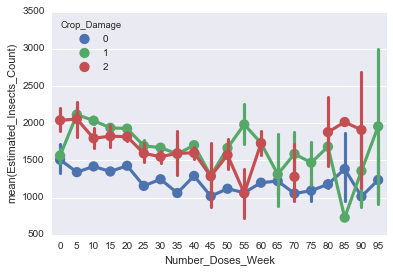

In [205]:
# Number of doses per week
train_sorted = train.sort_values(by='Number_Doses_Week')
sns.pointplot(x=train_sorted.Number_Doses_Week, y=train_sorted.Estimated_Insects_Count, hue=train_sorted.Crop_Damage);

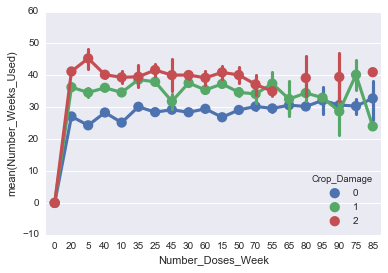

In [235]:
sns.pointplot(x=train_sorted.Number_Doses_Week, y=train_sorted.Number_Weeks_Used, hue=train_sorted.Crop_Damage);

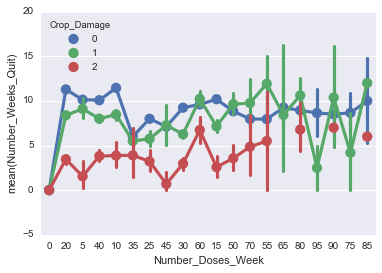

In [236]:
sns.pointplot(x=train_sorted.Number_Doses_Week, y=train_sorted.Number_Weeks_Quit, hue=train_sorted.Crop_Damage);

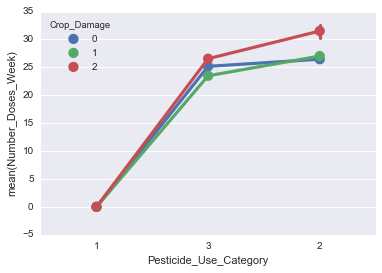

In [242]:
sns.pointplot(x=train_sorted.Pesticide_Use_Category, y=train_sorted.Number_Doses_Week, hue=train_sorted.Crop_Damage);

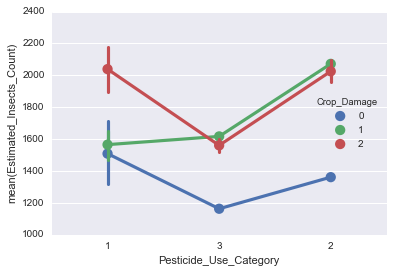

In [241]:
sns.pointplot(x=train_sorted.Pesticide_Use_Category, y=train_sorted.Estimated_Insects_Count, hue=train_sorted.Crop_Damage);

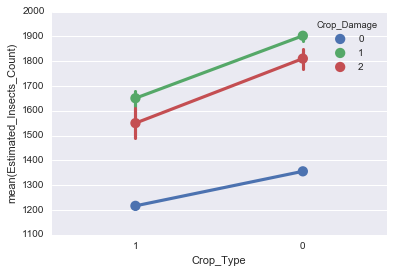

In [245]:
sns.pointplot(x=train_sorted.Crop_Type, y=train_sorted.Estimated_Insects_Count, hue=train_sorted.Crop_Damage);

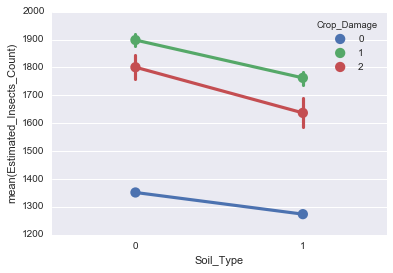

In [247]:
sns.pointplot(x=train_sorted.Soil_Type, y=train_sorted.Estimated_Insects_Count, hue=train_sorted.Crop_Damage);

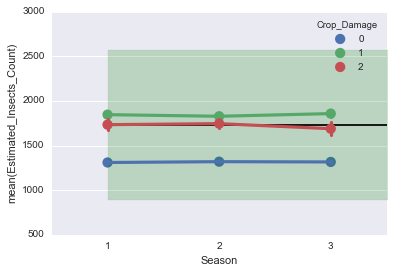

In [27]:
train_insects_mean = train[train.Crop_Damage==2].Estimated_Insects_Count.mean()
train_insects_std = train[train.Crop_Damage==2].Estimated_Insects_Count.std()

sns.pointplot(x=train.Season, y=train.Estimated_Insects_Count, hue=train.Crop_Damage)
plt.hlines(train_insects_mean, 0, 3)
plt.fill_between([0, 1, 2, 3], train_insects_mean - train_insects_std,
                 train_insects_mean + train_insects_std, alpha=0.2, color="g");

In [272]:
train.groupby('Crop_Type')['Estimated_Insects_Count'].mean()

Crop_Type
0    1446.555977
1    1279.369148
Name: Estimated_Insects_Count, dtype: float64

In [273]:
train.groupby('Pesticide_Use_Category')['Estimated_Insects_Count'].std()

Pesticide_Use_Category
1    1105.694352
2     833.623416
3     868.747950
Name: Estimated_Insects_Count, dtype: float64

In [268]:
estimated_insect_group_per_crop_type = train.groupby('Season')['Estimated_Insects_Count'].mean()

def avg_insect_count_per_crop_type(row):
    crop_type = row.Season
    return int(row.Estimated_Insects_Count < estimated_insect_group_per_crop_type.ix[crop_type])

In [269]:
train['Avg_insect_count_per_crop_type'] = train.apply(avg_insect_count_per_crop_type, axis=1)

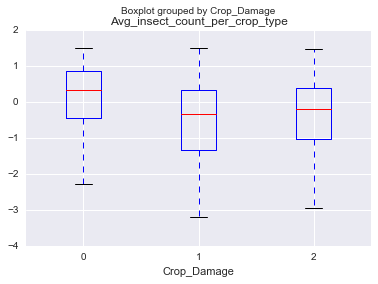

In [270]:
train.boxplot(column='Avg_insect_count_per_crop_type', by='Crop_Damage')

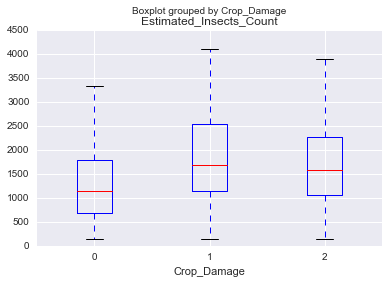

In [274]:
train.boxplot(column='Estimated_Insects_Count', by='Crop_Damage')

In [260]:
pd.crosstab(train.Crop_Damage, train.Avg_insect_count_per_crop_type, margins=True)

Avg_insect_count_per_crop_type,False,True,All
Crop_Damage,,,
0,29034,45204,74238
1,7776,4531,12307
2,1381,932,2313
All,38191,50667,88858


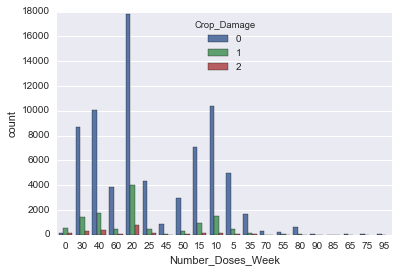

In [34]:
sns.countplot(x='Number_Doses_Week', hue='Crop_Damage', data=train);

In [46]:
train = train.fillna(train.Number_Weeks_Used.value_counts().sort_values(ascending=False).index[0])

In [54]:
train['total_dosage'] = (train.Number_Doses_Week * train.Number_Weeks_Used)

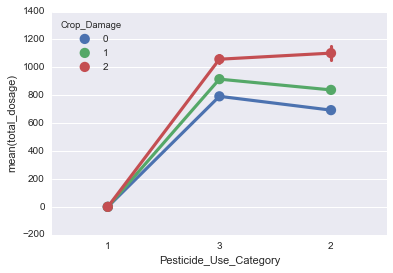

In [55]:
sns.pointplot(x=train.Pesticide_Use_Category, y=train.total_dosage, hue=train.Crop_Damage);

In [60]:
train['ratio_insect_dose'] = train.Estimated_Insects_Count / (train.total_dosage + 1)

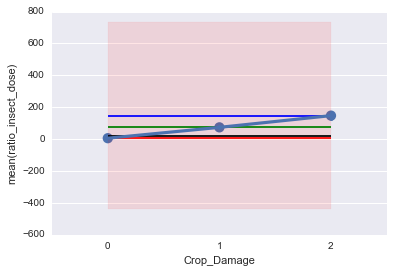

In [74]:
sns.pointplot(x=train.Crop_Damage, y=train.ratio_insect_dose)
plt.hlines(train.ratio_insect_dose.mean(), 0, 2,)
plt.hlines(train[train.Crop_Damage==0].ratio_insect_dose.mean(), 0, 2, 'r')
plt.hlines(train[train.Crop_Damage==1].ratio_insect_dose.mean(), 0, 2, 'g')
plt.hlines(train[train.Crop_Damage==2].ratio_insect_dose.mean(), 0, 2, 'b')
plt.fill_between([0, 1, 2], train[train.Crop_Damage==2].ratio_insect_dose.mean() - train[train.Crop_Damage==2].ratio_insect_dose.std(),
                train[train.Crop_Damage==2].ratio_insect_dose.mean() + train[train.Crop_Damage==2].ratio_insect_dose.std(),alpha=0.1,
                     color="r");

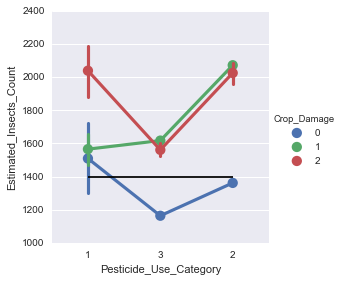

In [77]:
sns.factorplot(x="Pesticide_Use_Category", y="Estimated_Insects_Count", hue="Crop_Damage", data=train);
plt.hlines(train.Estimated_Insects_Count.mean(), 0, 2);

In [16]:
s

Estimated_Insects_Count  Number_Doses_Week  Crop_Damage
150                      0                  1               5
                         5                  0              19
                         10                 0              36
                                            1               1
                         15                 0              25
                         20                 0              47
                                            1               2
                         25                 0              20
                         30                 0              38
                                            2               1
                         35                 0               3
                         40                 0              34
                                            1               2
                         45                 0               3
                         50                 0              10
              

In [15]:
train.groupby(['Estimated_Insects_Count', 'Number_Doses_Week']).size()

Estimated_Insects_Count  Number_Doses_Week
150                      0                     5
                         5                    19
                         10                   37
                         15                   25
                         20                   49
                         25                   20
                         30                   39
                         35                    3
                         40                   36
                         45                    3
                         50                   10
                         60                    8
151                      0                     1
                         5                    13
                         10                   20
                         15                   13
                         20                   30
                         25                   10
                         30                   14
                         3

In [14]:
s.ix[(151, 0)]

Crop_Damage
1    1
dtype: int64